## Загужаем необходимые библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Загружаем данные

Собраны данные:
- weekday_key: день недели	
- hour_key: кол-во времени, которое ехал пассажир
- distance_km: дистанция в км
- offer_class_group: тип такси
- driver_response: код водителя

In [ ]:
df = pd.read_excel('Taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [ ]:
# Формируем выборку Comfort
df_comf = df[df['offer_class_group'] == 'Comfort']
df_comf.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,23.825352,2.142234,Comfort,1
15,6635,7,35.440650,10.889072,Comfort,1
16,7277,4,23.507660,28.825347,Comfort,1
17,7351,4,17.119628,17.280840,Comfort,0
23,9088,1,18.784024,4.125871,Comfort,0


In [ ]:
# Формируем выборку Economy
df_eco = df[df['offer_class_group'] == 'Economy']
df_eco.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
11,3845,3,21.305555,83.829973,Economy,0
13,4957,3,26.919090,14.238745,Economy,1
14,5150,5,21.139232,4.334163,Economy,0
20,8758,4,28.710615,26.412942,Economy,1
21,8985,3,18.988811,21.296147,Economy,1


In [ ]:
# Описательная статистика Economy
df_eco.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


In [ ]:
# Описательная статистика Comfort
df_comf.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


In [ ]:
print('Выборки имеют одинаковую длинну: ', len(df_comf) == len(df_eco))

Выборки имеют одинаковую длинну:  True


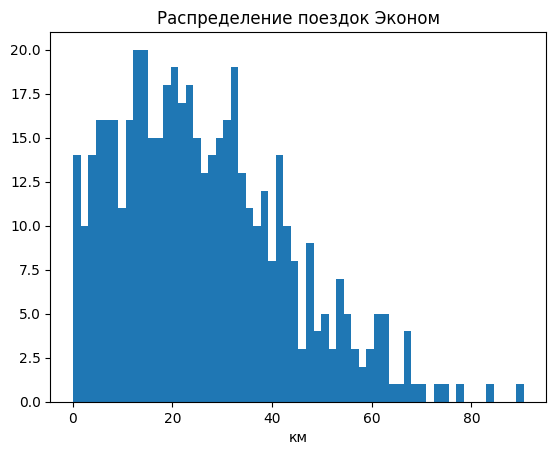

In [ ]:
# Посмотрим распределение поездок с помощью гистограммы плотности распределения данных
plt.hist(df_eco['distance_km'], 60)
plt.title('Распределение поездок Эконом')
plt.xlabel('км')
plt.show()

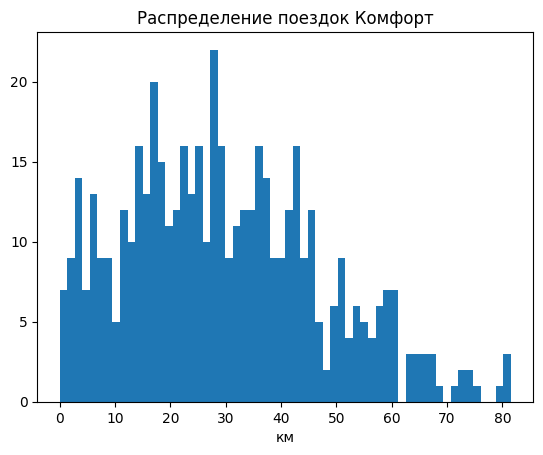

In [ ]:
# Посмотрим распределение поездок с помощью гистограммы плотности распределения данных
plt.hist(df_comf['distance_km'], 60)
plt.title('Распределение поездок Комфорт')
plt.xlabel('км')
plt.show()

На гистограммах положительная ассиметрия

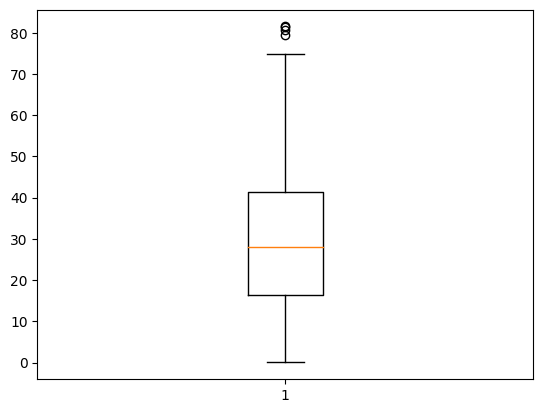

In [ ]:
plt.boxplot(df_comf['distance_km'])
plt.show()

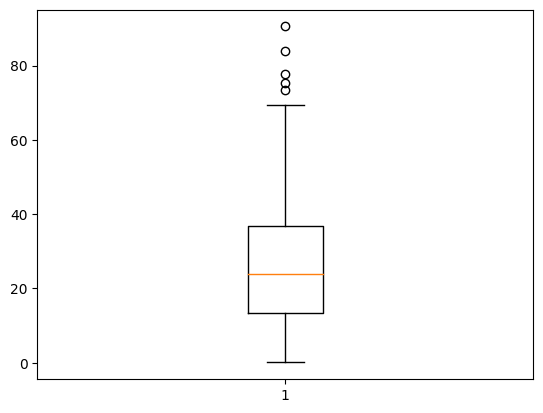

In [ ]:
plt.boxplot(df_eco['distance_km'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7cad8f6c5600>,
 'caps': [<matplotlib.lines.Line2D at 0x7cad8f6c5b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cad8f6c5360>,
 'medians': [<matplotlib.lines.Line2D at 0x7cad8f6c6080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cad8f6c6320>,
 'means': []}

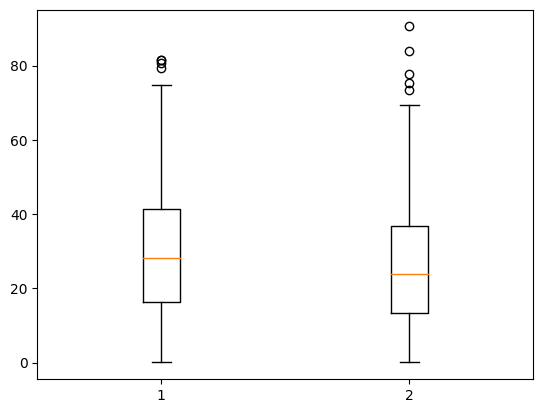

In [ ]:
plt.boxplot ([df_comf['distance_km'], df_eco['distance_km']])

#В комфорте больше поездок на длиннее расстояния, чем в экономе

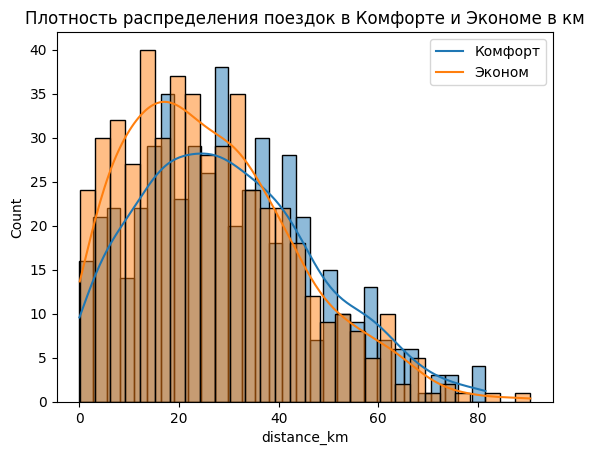

In [ ]:
sns.histplot(df_comf['distance_km'], kde=True, bins=30)
sns.histplot(df_eco['distance_km'], kde=True, bins=30)
plt.title('Плотность распределения поездок в Комфорте и Экономе в км')
plt.legend(['Комфорт', 'Эконом'])
plt.show()

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05
#Гипотеза: «На дальние поездки пользователи предпочитают Econom-классу более комфортные условия поездки в Comfort-классе»
#H0 нулевая гипотеза гласит, что выборки значимо не отличаются
result = ttest_ind(df_comf['distance_km'], df_eco['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


In [ ]:
#Проведение теста Манна - Уитни (U-критерий Манна - Уитни)
result = mannwhitneyu(df_comf['distance_km'], df_eco['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


In [ ]:
print(np.var(df_comf['distance_km'])/np.var(df_eco['distance_km']))

1.0752340469115458


Если p-значение меньше уровня значимости (обычно 0,05), то разница между двумя группами считается статистически значимой

#Вывод наша гипотеза верна: На дальние поездки пользователи предпочитают Econom-классу более комфортные условия поездки в Comfort-классе